<a href="https://colab.research.google.com/github/SaamarthMeston/Capstone-Project-3---Credit-card-default/blob/main/Capston_project_3_(Credit_car_default_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/SaamarthMeston/Capstone-Project-3---Credit-card-default.git

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and 
* family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Importing Data set**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Df = pd.read_excel('/content/drive/MyDrive/Capstone Project  3 (Credit Card Default Prediction.)/default of credit card clients.xls', header = 1 )

In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
Df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
Df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Data Preprosessing**

In [7]:
Df.drop('ID', axis =1, inplace=True)

In [8]:
Df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
Catagorical= ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [10]:
def Get_Unique(category):
  for i in category:
    Unique = Df[i].unique()
    print(i, Unique)

In [11]:
Get_Unique(Catagorical)

SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


In [12]:
Df['EDUCATION'].replace({0:4,5:4,6:4},inplace= True)

In [13]:
Df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [14]:
Df['MARRIAGE'].replace({0:3},inplace=True)

In [15]:
Df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [16]:
Df['SEX'].replace({2:0},inplace= True)

In [17]:
Df.SEX.value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

EDA

Sex feature

Text(0.5, 1.0, 'Sex Distribution')

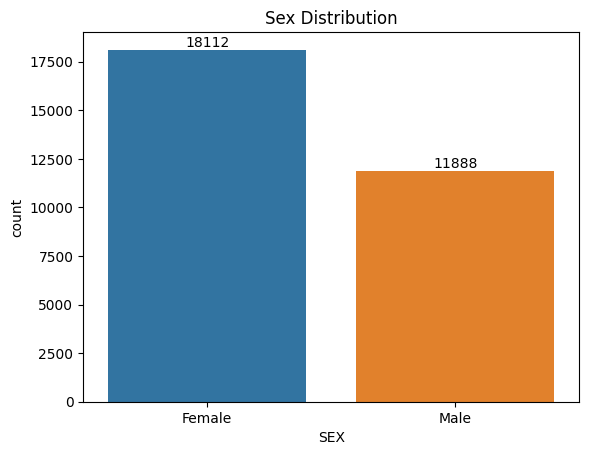

In [ ]:
ax =sns.countplot(Df,x = "SEX")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels = ['Female','Male'])
plt.title('Sex Distribution')

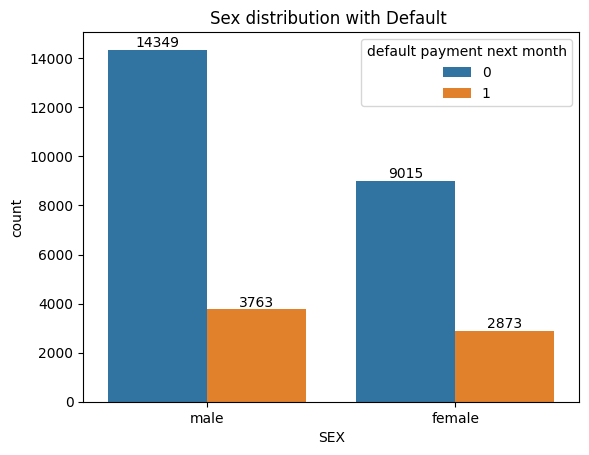

In [ ]:
ax=sns.countplot(Df, x="SEX", hue="default payment next month")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution with Default ")
plt.show()

Education feature

Text(0.5, 1.0, 'Education Distribution')

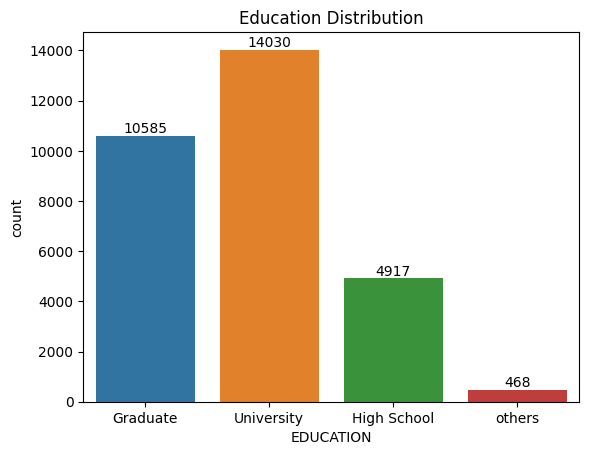

In [ ]:
ax = sns.countplot(Df, x ='EDUCATION')
for label in ax.containers:
  ax.bar_label(label)
plt.xticks([0,1,2,3], labels = ['Graduate','University','High School','others'])
plt.title("Education Distribution")

Text(0.5, 1.0, 'Education Distribution with Default')

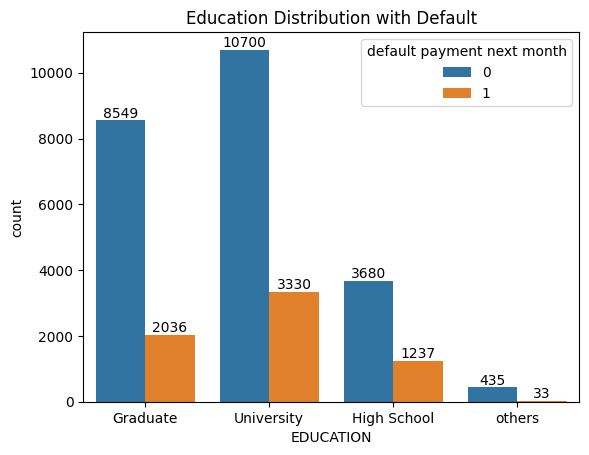

In [ ]:
ax = sns.countplot(Df, x ='EDUCATION',  hue="default payment next month")
for label in ax.containers:
  ax.bar_label(label)
plt.xticks([0,1,2,3], labels = ['Graduate','University','High School','others'])
plt.title("Education Distribution with Default")

Marriage Feature

Text(0.5, 1.0, 'Marriage Distribution')

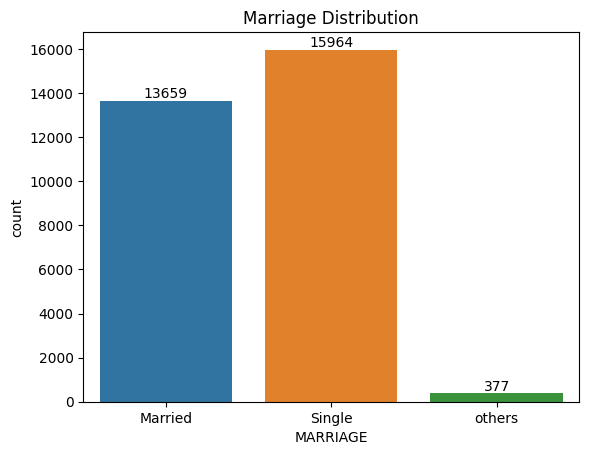

In [ ]:
ax = sns.countplot(Df, x ='MARRIAGE')
for label in ax.containers:
  ax.bar_label(label)
plt.xticks([0,1,2], labels = ['Married','Single','others'])
plt.title("Marriage Distribution")

Text(0.5, 1.0, 'Marriage Distribution with default')

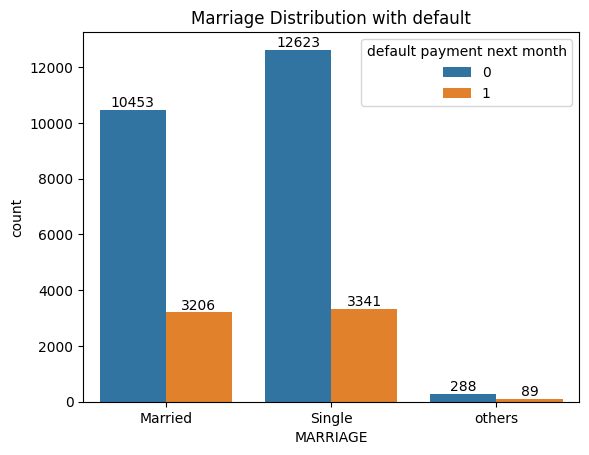

In [ ]:
ax = sns.countplot(Df, x ='MARRIAGE',  hue="default payment next month")
for label in ax.containers:
  ax.bar_label(label)
plt.xticks([0,1,2], labels = ['Married','Single','others'])
plt.title("Marriage Distribution with default")

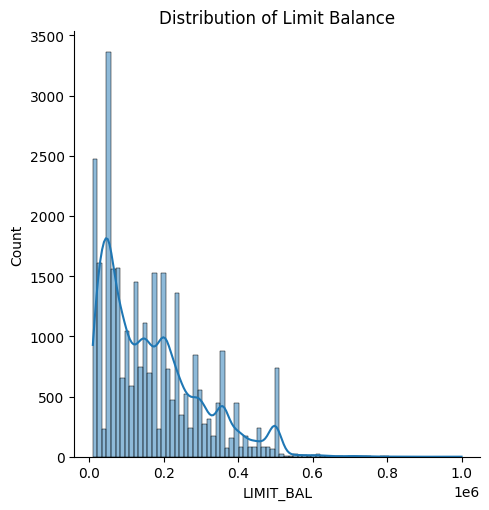

In [ ]:
sns.displot(Df, x = 'LIMIT_BAL', kde= True)
plt.title('Distribution of Limit Balance')
plt.show()

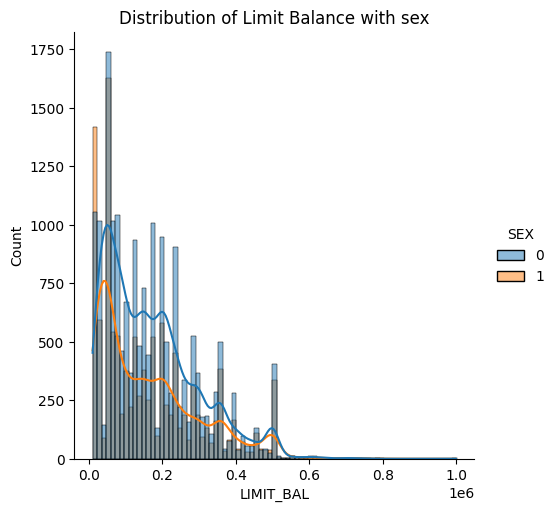

In [ ]:
sns.displot(Df, x = 'LIMIT_BAL', kde= True, hue='SEX')
plt.title('Distribution of Limit Balance with sex')
plt.show()

Age feature

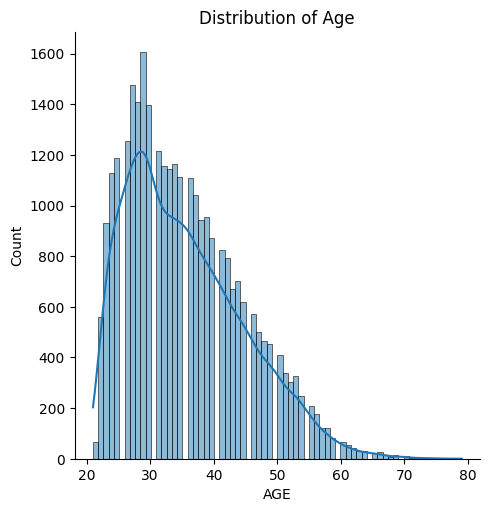

In [ ]:
sns.displot(Df, x = 'AGE', kde= True)
plt.title('Distribution of Age')
plt.show()

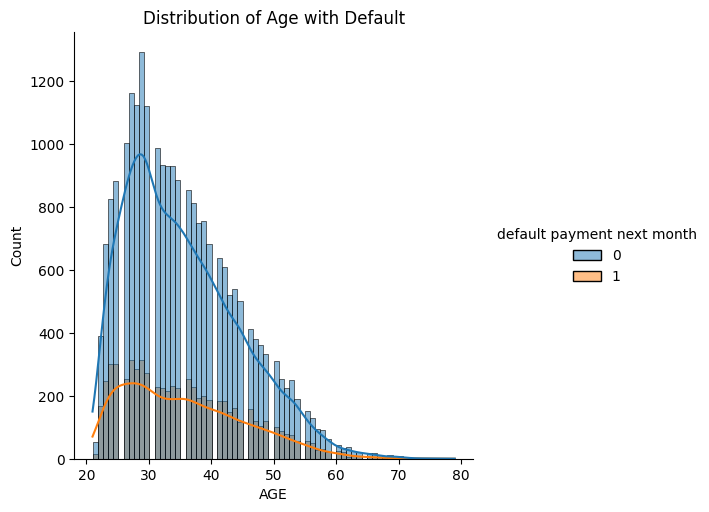

In [ ]:
sns.displot(Df, x = 'AGE', kde= True,  hue="default payment next month")
plt.title('Distribution of Age with Default')
plt.show()

# **Feature Engineering**

**Scaling**

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
Df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [20]:
scale = MinMaxScaler()

In [21]:
Df = scale.fit_transform(Df)

In [22]:
Df = pd.DataFrame(Df, columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'])

In [23]:
Df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.159075,0.396267,0.280756,0.278633,0.249750,0.19833,0.186623,0.183380,0.177933,0.173380,...,0.200891,0.120620,0.290851,0.006483,0.003516,0.005832,0.007771,0.011252,0.009865,0.221200
std,0.131058,0.489129,0.248165,0.260702,0.158929,0.11238,0.119719,0.119687,0.116914,0.113319,...,0.060601,0.060284,0.045766,0.018961,0.013680,0.019650,0.025227,0.035820,0.033627,0.415062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.000000,0.000000,0.000000,0.120690,0.10000,0.100000,0.100000,0.100000,0.100000,...,0.162330,0.082396,0.261944,0.001145,0.000495,0.000435,0.000477,0.000592,0.000223,0.000000
50%,0.131313,0.000000,0.333333,0.500000,0.224138,0.20000,0.200000,0.200000,0.200000,0.200000,...,0.178084,0.098600,0.274097,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.000000
75%,0.232323,1.000000,0.333333,0.500000,0.344828,0.20000,0.200000,0.200000,0.200000,0.200000,...,0.211482,0.130415,0.298787,0.005731,0.002969,0.005028,0.006463,0.009452,0.007566,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Handling Class Imbalance

In [24]:
x=Df.drop('default payment next month', axis = 1)

In [25]:
y = Df['default payment next month']

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE()

x, y = smote.fit_resample(x,y)

print(len(y))

46728


In [ ]:
x.shape

(46728, 23)

In [ ]:
y.shape

(46728,)

Spliting Data for Training and testing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.33, random_state=42)

# **Modeling**

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay

Logestic Regression

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay

In [85]:
Logit = LogisticRegression()

In [86]:
Logit.fit(x_train,y_train)

LogisticRegression()

In [87]:
pred_log = Logit.predict(x_test)

In [88]:
print(confusion_matrix(y_test,pred_log))

[[5277 2419]
 [2648 5077]]


In [89]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      7696
         1.0       0.68      0.66      0.67      7725

    accuracy                           0.67     15421
   macro avg       0.67      0.67      0.67     15421
weighted avg       0.67      0.67      0.67     15421



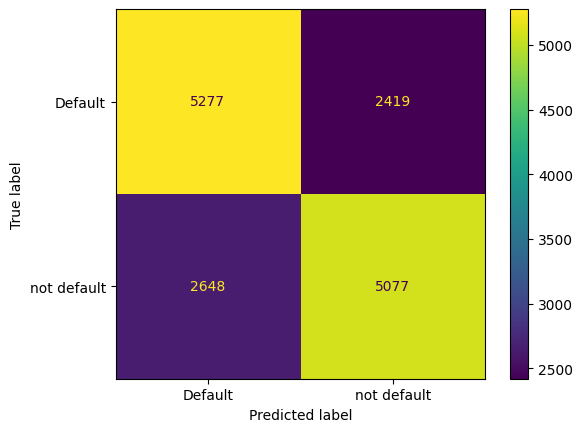

In [169]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_log), display_labels=['Default','not default'])
disp.plot()
plt.show()

In [90]:
fpr_logit_1, tpr_logit_2, thresh_logit = roc_curve(y_test,pred_log)
accu_logit = accuracy_score(y_test,pred_log)

Naive bayes Classifier

In [91]:
GausNB = GaussianNB()

In [92]:
GausNB.fit(x_train,y_train)

GaussianNB()

In [93]:
NB_pred = GausNB.predict(x_test)

In [94]:
print(confusion_matrix(y_test,NB_pred))

[[1856 5840]
 [ 660 7065]]


In [95]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.24      0.36      7696
         1.0       0.55      0.91      0.68      7725

    accuracy                           0.58     15421
   macro avg       0.64      0.58      0.52     15421
weighted avg       0.64      0.58      0.52     15421



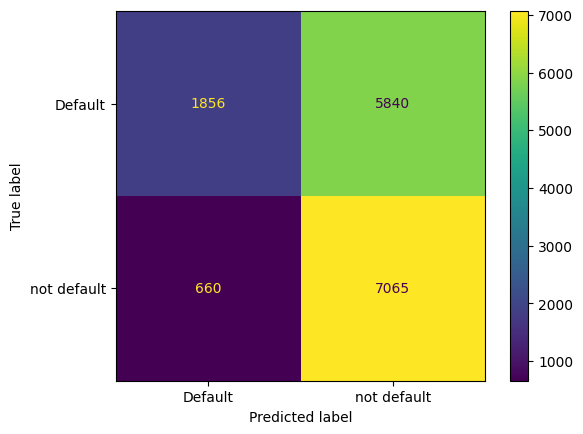

In [170]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,NB_pred), display_labels=['Default','not default'])
disp.plot()
plt.show()

In [96]:
fpr_NBC_1, tpr_NBC_2, thresh_NBC = roc_curve(y_test,NB_pred)
accu_NBC = accuracy_score(y_test,NB_pred)

**KNN Classifier**

In [97]:
KNN = KNeighborsClassifier()

In [98]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [99]:
Pred_KN = KNN.predict(x_test)

In [100]:
print(confusion_matrix(y_test,Pred_KN))

[[5124 2572]
 [1090 6635]]


In [101]:
print(classification_report(y_test,Pred_KN))

              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74      7696
         1.0       0.72      0.86      0.78      7725

    accuracy                           0.76     15421
   macro avg       0.77      0.76      0.76     15421
weighted avg       0.77      0.76      0.76     15421



In [102]:
KNC = KNeighborsClassifier()
param = {'n_neighbors':np.arange(1,20)}
KNerst = GridSearchCV(KNC,param,scoring='roc_auc',cv=3)
KNerst.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='roc_auc')

In [103]:
KNerst.best_params_

{'n_neighbors': 3}

In [104]:
KNerst.best_score_

0.8217856222958583

In [105]:
Pred_KNerst = KNerst.predict(x_test)

In [106]:
print(confusion_matrix(y_test,Pred_KNerst))

[[5199 2497]
 [ 932 6793]]


In [107]:
print(classification_report(y_test,Pred_KNerst))

              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75      7696
         1.0       0.73      0.88      0.80      7725

    accuracy                           0.78     15421
   macro avg       0.79      0.78      0.78     15421
weighted avg       0.79      0.78      0.78     15421



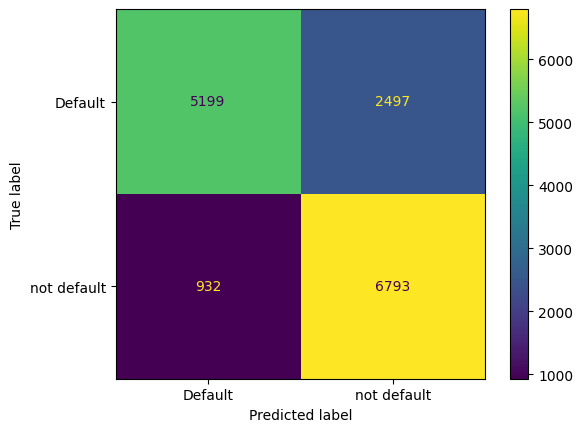

In [173]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,Pred_KNerst), display_labels=['Default','not default'])
disp.plot()
plt.show()

In [108]:
fpr_KNN_1, tpr_KNN_2, thresh_KNN = roc_curve(y_test,Pred_KNerst)
accu_KNN = accuracy_score(y_test,Pred_KNerst)

**RandomForest**

In [109]:
RF = RandomForestClassifier(n_estimators=150, max_depth=10)

In [110]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

In [111]:
pred = RF.predict(x_test)

In [113]:
print(confusion_matrix(y_test,pred))

[[6605 1091]
 [2483 5242]]


In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79      7696
         1.0       0.83      0.68      0.75      7725

    accuracy                           0.77     15421
   macro avg       0.78      0.77      0.77     15421
weighted avg       0.78      0.77      0.77     15421



In [115]:
RandForest = RandomForestClassifier()
param = {'n_estimators':[10,50,100,200,250,500,1000],
         'max_depth':[2,4,7,6,8,10,12,14,16,18,20]}
ForstCl = GridSearchCV(RandForest,param, scoring='roc_auc',cv=3)
ForstCl.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 7, 6, 8, 10, 12, 14, 16, 18, 20],
                         'n_estimators': [10, 50, 100, 200, 250, 500, 1000]},
             scoring='roc_auc')

In [116]:
ForstCl.best_params_

{'max_depth': 20, 'n_estimators': 1000}

In [117]:
ForstCl.best_score_

0.8972883861273909

In [118]:
pred_cv = ForstCl.predict(x_test)

In [119]:
print(confusion_matrix(y_test,pred_cv))

[[6676 1020]
 [1524 6201]]


In [120]:
print(classification_report(y_test,pred_cv))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      7696
         1.0       0.86      0.80      0.83      7725

    accuracy                           0.84     15421
   macro avg       0.84      0.84      0.83     15421
weighted avg       0.84      0.84      0.83     15421



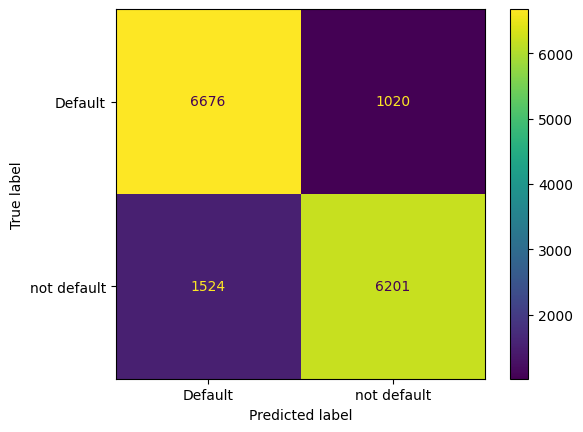

In [172]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred_cv), display_labels=['Default','not default'])
disp.plot()
plt.show()

In [121]:
fpr_RF_1, tpr_RF_2, thresh_RF = roc_curve(y_test,pred_cv)
accu_RF = accuracy_score(y_test,pred_cv)

**XGBoost Classifier**

In [124]:
params={
 "n_estimators":[50,100,500,1000], 
 "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth":[ 3, 4, 5, 6, 8, 10, 12, 15]
 }
XGBoost = XGBClassifier()
Boosted_tree = GridSearchCV(XGBoost,param, scoring='roc_auc',cv=3)
Boosted_tree.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 4, 7, 6, 8, 10, 12, 14, 16, 18, 20],
                         'n_estimators': [10, 50, 100, 200, 250, 500, 1000]},
             scoring='roc_auc')

In [125]:
Boosted_tree.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [126]:
XGB_pred = Boosted_tree.predict(x_test)

In [127]:
print(confusion_matrix(y_test,XGB_pred))

[[6969  727]
 [1247 6478]]


In [128]:
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      7696
         1.0       0.90      0.84      0.87      7725

    accuracy                           0.87     15421
   macro avg       0.87      0.87      0.87     15421
weighted avg       0.87      0.87      0.87     15421



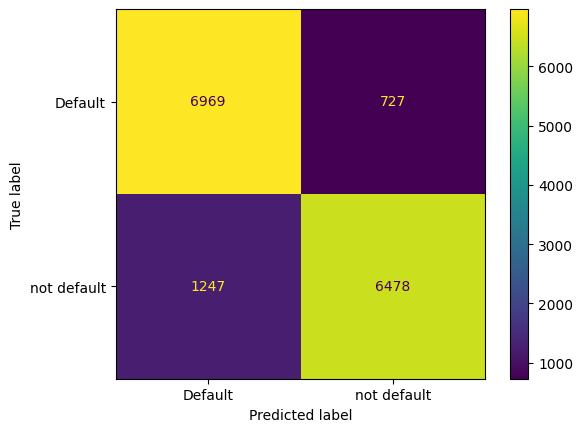

In [171]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,XGB_pred), display_labels=['Default','not default'])
disp.plot()
plt.show()

In [129]:
fpr_XGB_1, tpr_RF_XGB, thresh_XGB = roc_curve(y_test,XGB_pred)
accu_XGB = accuracy_score(y_test,XGB_pred)

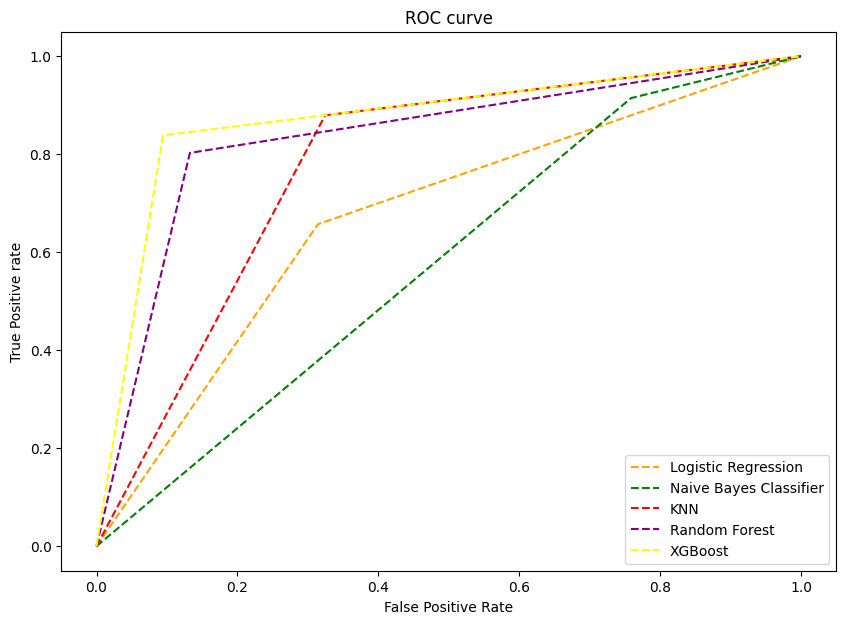

In [134]:
plt.figure(figsize=(10,7))
plt.plot(fpr_logit_1, tpr_logit_2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_NBC_1, tpr_NBC_2, linestyle='--',color='green', label='Naive Bayes Classifier')
plt.plot(fpr_KNN_1, tpr_KNN_2, linestyle='--', color='red', label='KNN')
plt.plot(fpr_RF_1, tpr_RF_2, linestyle='--', color='purple', label='Random Forest')
plt.plot(fpr_XGB_1, tpr_RF_XGB, linestyle='--', color='yellow', label='XGBoost')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [140]:
Accuracy = {'Logit':accu_logit,'Naive Bayes':accu_NBC,'KNN':accu_KNN,'Random Forest':accu_RF,'XGBoost':accu_XGB}

In [142]:
print(Accuracy)

{'Logit': 0.6714220867648012, 'Naive Bayes': 0.5784968549380715, 'KNN': 0.7776408793204073, 'Random Forest': 0.8350301536865313, 'XGBoost': 0.8719927371765774}


In [164]:
def Accu_df(x):
  Accuracy_df = pd.DataFrame()
  Accuracy_df['Models'] = list(x.keys())
  Accuracy_df['Accuracy_score'] = list(x.values())
  return Accuracy_df

In [165]:
Accu_df(Accuracy)

,Models,Accuracy_score
0,Logit,0.671422
1,Naive Bayes,0.578497
2,KNN,0.777641
3,Random Forest,0.835030
4,XGBoost,0.871993


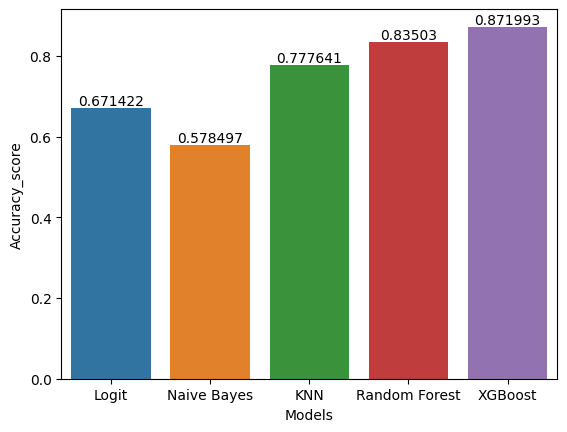

In [166]:
ax = sns.barplot(Accu_df(Accuracy), y = 'Accuracy_score',x = 'Models')
for label in ax.containers:
  ax.bar_label(label)